## BackTesting

- 이론, 방식, 시스템 등을 과거 데이터를 적용해 현재 가치를 평가하고 최적화하는 과정
- 금융시장은 변화하고 진화하기 때문에 어려운 복잡계
- 최대한 많은 유형의 시장을 백테스트 기간에 포함시키는 것이 관점
- 시장은 강한 강세, 약한 강세, 강한 약세, 강한 약세, 횡보하는 박스권 등이 특징
- 2013년도 시에는 시장의 변동성이 큰 것이 특징

### Markowitz Portfolio Optimization in Python
https://plot.ly/ipython-notebooks/markowitz-portfolio-optimization/

#### 1. BT (Backtesting) package 이용

In [6]:
import bt
%matplotlib inline

In [7]:
data = bt.get('spy,agg', start='2010-01-01')
print data.head()

                   spy        agg
Date                             
2010-01-04   99.808658  86.458831
2010-01-05  100.072861  86.852169
2010-01-06  100.143318  86.801958
2010-01-07  100.566052  86.701529
2010-01-08  100.900712  86.751747


In [8]:
s = bt.Strategy('s1', [bt.algos.RunMonthly(),     
                       bt.algos.SelectAll(),      
                       bt.algos.WeighEqually(),   
                       bt.algos.Rebalance()])      
# 여기서 말하는 Strategy란, SMA(Simple Moving Average), SMA Crossover, Tree MAV Structure 전략이 있습니다.

In [9]:
test = bt.Backtest(s, data) # class bt.backtest.Backtest(strategy, data, name=None, initial_capital=1000000.0, commissions=None)
res = bt.run(test)

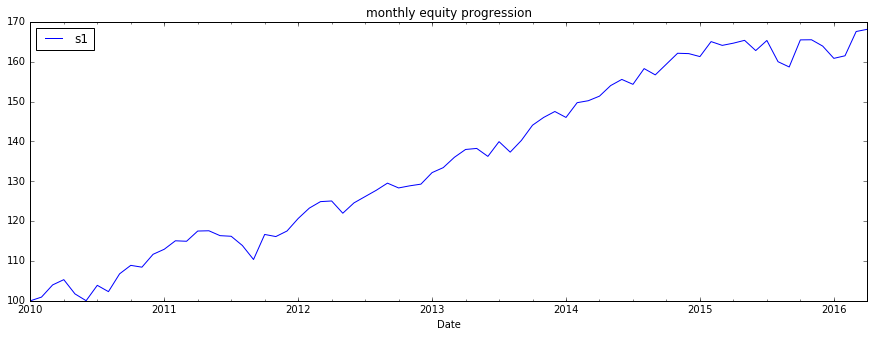

In [10]:
res.plot()

In [11]:
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-04
End                  2016-05-06
Risk-free rate       0.00%

Total Return         68.09%
Daily Sharpe         1.14
CAGR                 8.54%
Max Drawdown         -7.83%

MTD                  -0.02%
3m                   6.00%
6m                   1.51%
YTD                  2.55%
1Y                   2.65%
3Y (ann.)            6.65%
5Y (ann.)            7.54%
10Y (ann.)           8.54%
Since Incep. (ann.)  8.54%

Daily Sharpe         1.14
Daily Mean (ann.)    8.48%
Daily Vol (ann.)     7.45%
Daily Skew           -0.33
Daily Kurt           3.58
Best Day             2.48%
Worst Day            -3.11%

Monthly Sharpe       1.33
Monthly Mean (ann.)  8.43%
Monthly Vol (ann.)   6.35%
Monthly Skew         0.04
Monthly Kurt         0.02
Best Month           5.69%
Worst Month          -3.39%

Yearly Sharpe        1.43
Yearly Mean          7.15%
Yearly Vol           4.99%
Yearly Skew          0.14
Yearly Kurt   

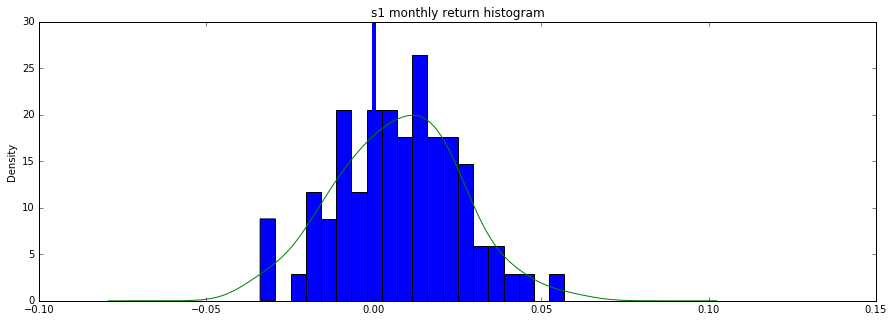

In [14]:
res.plot_histogram()

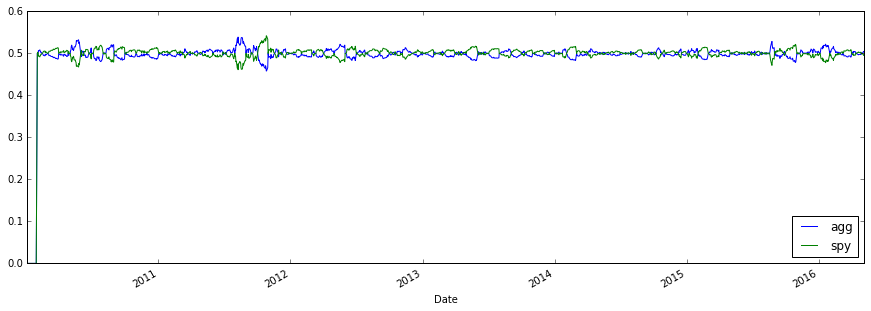

In [15]:
res.plot_security_weights()

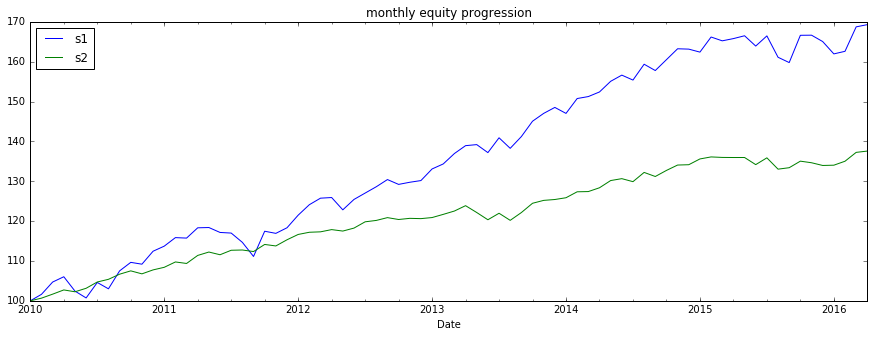

In [17]:
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
res2 = bt.run(test, test2)

res2.plot()

In [18]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-04  2010-01-04
End                  2016-05-06  2016-05-06
Risk-free rate       0.00%       0.00%

Total Return         65.92%      36.25%
Daily Sharpe         1.10        1.47
CAGR                 8.32%       5.00%
Max Drawdown         -7.83%      -4.07%

MTD                  -0.02%      0.15%
3m                   6.00%       3.09%
6m                   1.51%       2.69%
YTD                  2.55%       2.86%
1Y                   2.65%       2.09%
3Y (ann.)            6.65%       3.68%
5Y (ann.)            7.55%       4.33%
10Y (ann.)           8.32%       5.00%
Since Incep. (ann.)  8.32%       5.00%

Daily Sharpe         1.10        1.47
Daily Mean (ann.)    8.28%       4.94%
Daily Vol (ann.)     7.50%       3.37%
Daily Skew           -0.34       -0.25
Daily Kurt           3.46        2.99
Best Day             2.48%       1.20%
Worst Day            -3.11%      -1.13%

Monthly S

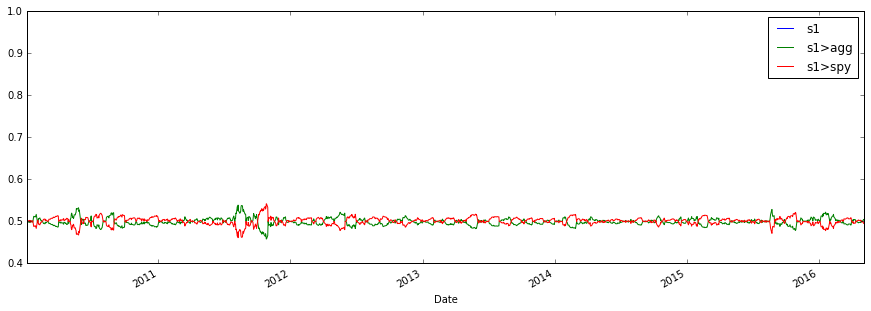

In [20]:
res2.plot_weights()

#### 2. arch 이용
http://arch.readthedocs.io/en/latest/index.html

In [22]:
from arch import arch_model
import datetime as dt
import pandas.io.data as web

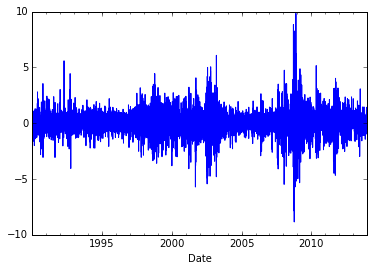

In [40]:
st = dt.datetime(1990,1,1)
en = dt.datetime(2014,1,1)

# FTSE = 런던 증권거래소에 상장된 지수
data = web.get_data_yahoo('^FTSE',start=st, end=en)
returns = 100 * data['Adj Close'].pct_change().dropna()
figure = returns.plot()

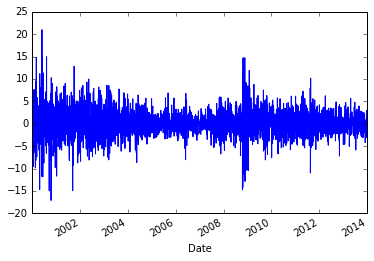

In [43]:
data = web.DataReader('005380.KS',"yahoo",start=st, end=en)
returns = 100 * data['Adj Close'].pct_change().dropna()
figure = returns.plot()

In [44]:
from arch import arch_model
am = arch_model(returns)
res = am.fit(update_freq=5)
print res.summary

Iteration:      5,   Func. Count:     36,   Neg. LLF: 8473.72146141
Iteration:     10,   Func. Count:     72,   Neg. LLF: 8462.75730777
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8462.70327951
            Iterations: 13
            Function evaluations: 90
            Gradient evaluations: 13
<bound method ARCHModelResult.summary of <arch.univariate.base.ARCHModelResult object at 0x000000001FE1A780>>


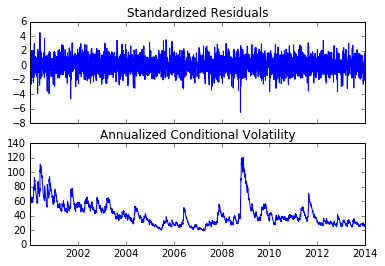

In [45]:
fig = res.plot(annualize='D')

In [52]:
from arch.univariate import ARX
ar = ARX(returns, lags=[1,3,12])
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:              Adj Close   R-squared:                       0.003
Mean Model:                        AR   Adj. R-squared:                  0.002
Vol Model:          Constant Variance   Log-Likelihood:               -8902.34
Distribution:                  Normal   AIC:                           17814.7
Method:            Maximum Likelihood   BIC:                           17845.6
                                        No. Observations:                 3617
Date:                Sun, May 08 2016   Df Residuals:                     3612
Time:                        13:08:28   Df Model:                            5
                                    Mean Model                                   
                    coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------------
Const             0.1261  2.319e-03     54.

- R-squared : 상관계수를 제곱한 수치, 회귀분석에서 R-square 값이 회귀 모델 자체에 대한 통계적 검증 지표
- 상관계수 : (1) 피어슨, (2) 스피어만 등이 있지만, 두 변수간에 어떤 선형적 관계를 갖고 있는지를 분석하는 방법
- Adj.R-squared란 R-Square를 보수적으로 사용한 수치, 표본의 크기가 200개 이상인 경우 Adj. R-squared로 해석하는 것이 빠름
    - 회귀 분석 시 R sqaure값이 0.4이상이 되지 않으면 나머지 지표들은 볼필요가 없는 것이므로 위의 자료 summary는 볼 필요가 없다?
- Log-Likelihood, AIC(Akaike Information Criteria), BIC(Bayesian Information Criterion)
    - Log-Likehood, AIC, BIC는 모델이 적합한지를 나타내는 척도이며, 값이 낮을수록 좋은 모델을 뜻함.
    - Log-Likelihood는 대수우도라 함. 우도값에 Log를 취한 값
    - 우도: 현상에 대해서 가장 가능성이 있는 수
- AIC는 정보량 지수로 정보량과 복잡성을 동시에 측정. 정보량이 많은 모델도 간단명료하지 않으면 좋지 않은 모델이라는 가정에서 출발한 지수
- BIC도 AIC의 값과 비슷한 측정모델

http://dermabae.tistory.com/category/%EC%9D%98%ED%95%99%ED%86%B5%EA%B3%84%20%EA%B3%B5%EB%B6%80%ED%95%98%EA%B8%B0/%EA%B0%9C%EB%85%90%20%EC%A0%95%EB%A6%AC%ED%95%98%EA%B8%B0

In [54]:
from arch.univariate import ARCH, GARCH
ar.volatility = ARCH(p=5)
res = ar.fit(update_freq=0, disp='off')
print res.summary()

                           AR - ARCH Model Results                            
Dep. Variable:              Adj Close   R-squared:                       0.002
Mean Model:                        AR   Adj. R-squared:                  0.002
Vol Model:                       ARCH   Log-Likelihood:               -8583.03
Distribution:                  Normal   AIC:                           17186.1
Method:            Maximum Likelihood   BIC:                           17248.0
                                        No. Observations:                 3617
Date:                Sun, May 08 2016   Df Residuals:                     3607
Time:                        13:35:15   Df Model:                           10
                                    Mean Model                                   
                    coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------------
Const             0.1328  1.560e-03     85.

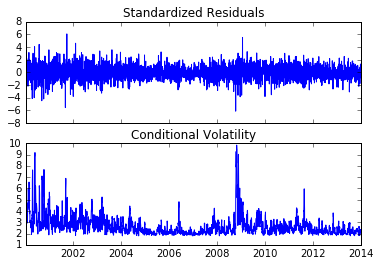

In [56]:
fig = res.plot()

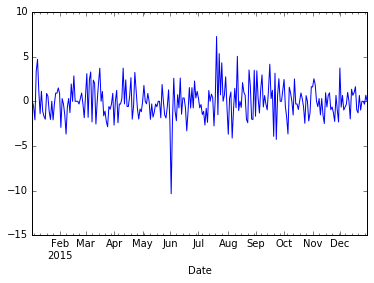

In [76]:
st = dt.datetime(2015,1,1)
en = dt.datetime(2015,12,30)

data = web.DataReader('005380.KS',"yahoo",start=st, end=en)
returns = 100 * data['Adj Close'].pct_change().dropna()
figure = returns.plot()

In [77]:
am = arch_model(returns)
res = am.fit(update_freq=5)
print res.summary

Iteration:      5,   Func. Count:     38,   Neg. LLF: 532.786537613
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 532.783077454
            Iterations: 7
            Function evaluations: 50
            Gradient evaluations: 7
<bound method ARCHModelResult.summary of <arch.univariate.base.ARCHModelResult object at 0x000000001FDDBF28>>


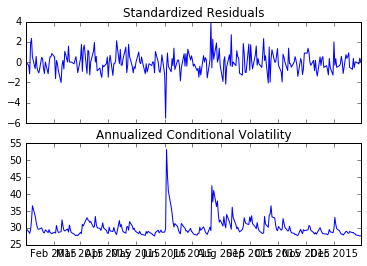

In [78]:
fig = res.plot(annualize='D')

In [79]:
from arch.univariate import ARX
ar = ARX(returns, lags=[1,3,12])
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:              Adj Close   R-squared:                       0.005
Mean Model:                        AR   Adj. R-squared:                 -0.007
Vol Model:          Constant Variance   Log-Likelihood:               -507.389
Distribution:                  Normal   AIC:                           1024.78
Method:            Maximum Likelihood   BIC:                           1042.33
                                        No. Observations:                  247
Date:                Sun, May 08 2016   Df Residuals:                      242
Time:                        14:05:42   Df Model:                            5
                                    Mean Model                                   
                    coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------------
Const            -0.0277  1.435e-02     -1.

In [81]:
from arch.univariate import ARCH, GARCH
ar.volatility = GARCH(1,1)
res = ar.fit(update_freq=5, disp='off')
print res.summary()

                         AR - GJR-GARCH Model Results                         
Dep. Variable:              Adj Close   R-squared:                      -0.021
Mean Model:                        AR   Adj. R-squared:                 -0.034
Vol Model:                  GJR-GARCH   Log-Likelihood:               -504.161
Distribution:                  Normal   AIC:                           1024.32
Method:            Maximum Likelihood   BIC:                           1052.40
                                        No. Observations:                  247
Date:                Sun, May 08 2016   Df Residuals:                      239
Time:                        14:18:37   Df Model:                            8
                                    Mean Model                                   
                    coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------------
Const            -0.1233  2.479e-02     -4.